In [30]:
import pandas as pd  
import cv2                  
import numpy as np          
import os                   
from random import shuffle 
from tqdm import tqdm   
import scipy 
import skimage 
from skimage.transform import resize 
from sklearn.model_selection import train_test_split 

In [41]:
print(os.listdir("C:\\Users\\kusha\\OneDrive\\Desktop\\cancer\\cancer")) 

['test', 'train', 'val']


In [42]:
print(os.listdir("C:\\Users\\kusha\\OneDrive\\Desktop\\cancer\\cancer\\train")) 

['Cancer', 'Normal']


In [43]:
TRAIN_DIR = "C:\\Users\\kusha\\OneDrive\\Desktop\\cancer\\cancer\\train"

In [44]:
TEST_DIR = "C:\\Users\\kusha\\OneDrive\\Desktop\\cancer\\cancer\\test"

In [45]:
def get_label(Dir): 
    for nextdir in os.listdir(Dir): 
        if not nextdir.startswith('.'): 
            if nextdir in ['NORMAL']: 
                label = 0 
            elif nextdir in ['CANCER']: 
                label = 1 
            else: 
                label = 2 
    return nextdir, label

In [46]:
def preprocessing_data(Dir): 
    X = [] 
    y = [] 
     
    for nextdir in os.listdir(Dir): 
        nextdir, label = get_label(Dir) 
        temp = Dir + nextdir 
         
        for image_filename in tqdm(os.listdir(temp)): 
            path = os.path.join(temp + '/' , image_filename) 
            img = cv2.imread(path,cv2.IMREAD_GRAYSCALE) 
            if img is not None: 
                img = skimage.transform.resize(img, (150, 150, 3)) 
                img = np.asarray(img) 
                X.append(img) 
                y.append(label)       
                X = np.asarray(X) 
                y = np.asarray(y)    
                return X,y

In [47]:
import os
import cv2
import numpy as np
import skimage.transform
from tqdm import tqdm

def get_data(Dir):
    X = []
    y = []

    # Ensure the directory path ends with a slash
    if not Dir.endswith(os.sep):
        Dir += os.sep

    for nextDir in os.listdir(Dir):
        if not nextDir.startswith('.'):
            if nextDir == 'NORMAL':
                label = 0
            elif nextDir == 'CANCER':
                label = 1
            else:
                label = 2

            temp = os.path.join(Dir, nextDir)
            print(f'Processing directory: {temp}')

            # Check if the directory exists
            if not os.path.exists(temp):
                print(f'Directory does not exist: {temp}')
                continue

            for file in tqdm(os.listdir(temp)):
                file_path = os.path.join(temp, file)
                img = cv2.imread(file_path)
                if img is not None:
                    img = skimage.transform.resize(img, (150, 150, 3))
                    img = np.asarray(img)
                    X.append(img)
                    y.append(label)
                else:
                    print(f'Failed to read image: {file_path}')

    X = np.asarray(X)
    y = np.asarray(y)
    return X, y


In [48]:
X_train, y_train = get_data(TRAIN_DIR) 
X_test , y_test = get_data(TEST_DIR) 

Processing directory: C:\Users\kusha\OneDrive\Desktop\cancer\cancer\train\Cancer


  0%|                                                                                         | 0/2478 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████| 2478/2478 [00:50<00:00, 49.06it/s]


Processing directory: C:\Users\kusha\OneDrive\Desktop\cancer\cancer\train\Normal


100%|██████████████████████████████████████████████████████████████████████████████| 2483/2483 [00:51<00:00, 48.38it/s]


Processing directory: C:\Users\kusha\OneDrive\Desktop\cancer\cancer\test\Cancer


100%|████████████████████████████████████████████████████████████████████████████████| 629/629 [00:13<00:00, 47.19it/s]


Processing directory: C:\Users\kusha\OneDrive\Desktop\cancer\cancer\test\Normal


100%|████████████████████████████████████████████████████████████████████████████████| 620/620 [00:12<00:00, 50.51it/s]


In [49]:
print(X_train.shape,'\n',X_test.shape) 
print(y_train.shape,'\n',y_test.shape) 

(4961, 150, 150, 3) 
 (1249, 150, 150, 3)
(4961,) 
 (1249,)


In [50]:
 
from tensorflow.keras.utils import to_categorical 
y_train = to_categorical(y_train-1, 2) 
y_test = to_categorical(y_test-1, 2) 

In [51]:
%pip install tensorflow opencv-python scikit-image tqdm numpy


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\kusha\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [52]:
print(y_train.shape,'\n',y_test.shape) 

(4961, 2) 
 (1249, 2)


In [71]:
Pimages = os.listdir(TRAIN_DIR + "\\Cancer") 
Nimages = os.listdir(TRAIN_DIR + "\\Normal") 

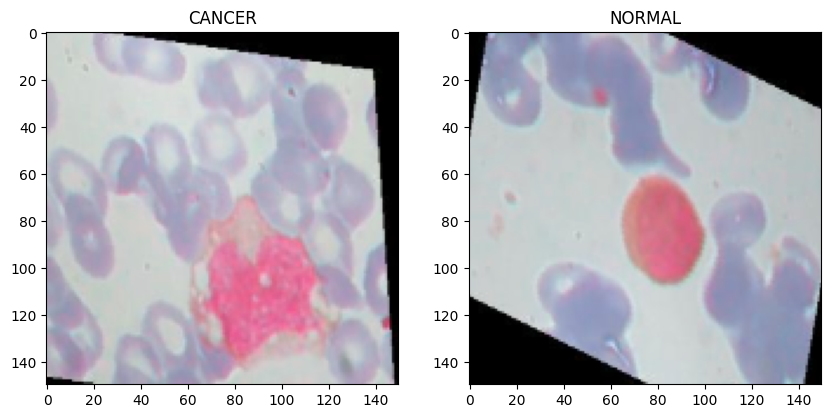

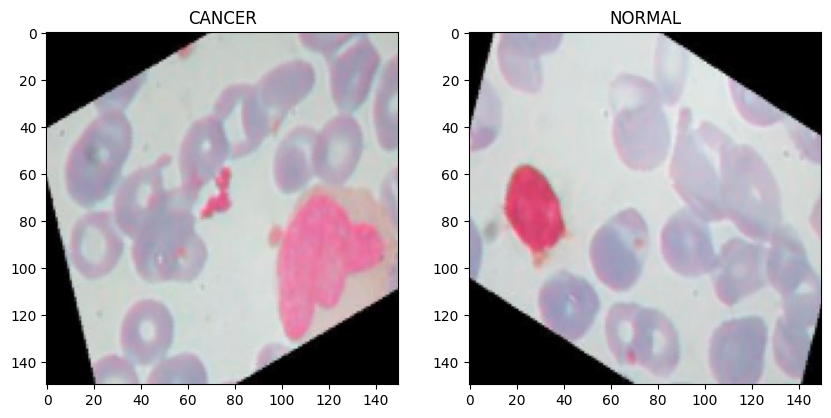

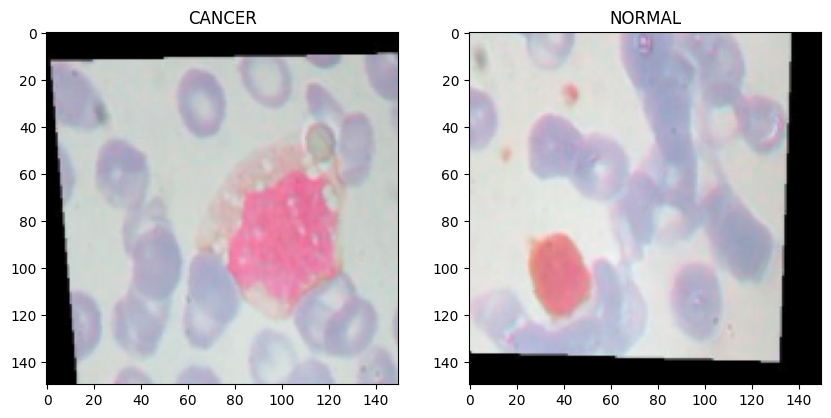

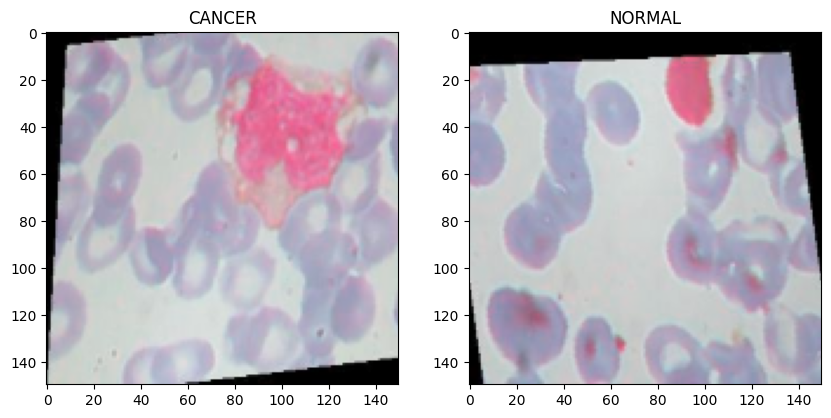

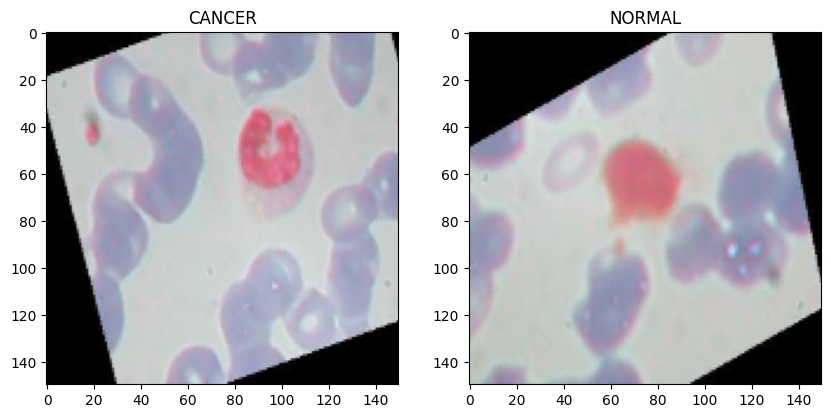

In [73]:
import matplotlib.pyplot as plt

def plotter(i):
    # Construct the file paths for the images
    cancer_image_path = os.path.join(TRAIN_DIR, "CANCER", Pimages[i])
    normal_image_path = os.path.join(TRAIN_DIR, "NORMAL", Nimages[i])
    
    # Read and process the cancer image
    imagep1 = cv2.imread(cancer_image_path)
    if imagep1 is not None:
        imagep1 = skimage.transform.resize(imagep1, (150, 150, 3), mode='reflect')
    else:
        print(f"Failed to read image: {cancer_image_path}")
    
    # Read and process the normal image
    imagen1 = cv2.imread(normal_image_path)
    if imagen1 is not None:
        imagen1 = skimage.transform.resize(imagen1, (150, 150, 3))
    else:
        print(f"Failed to read image: {normal_image_path}")
    
    # Plot the images
    if imagep1 is not None and imagen1 is not None:
        plt.figure(figsize=(10, 5))
        
        plt.subplot(1, 2, 1)
        plt.imshow(imagep1)
        plt.title('CANCER')

        plt.subplot(1, 2, 2)
        plt.imshow(imagen1)
        plt.title('NORMAL')

        plt.show()

# Example usage
Pimages = os.listdir(os.path.join(TRAIN_DIR, "CANCER"))
Nimages = os.listdir(os.path.join(TRAIN_DIR, "NORMAL"))

for i in range(5):
    plotter(i)


In [74]:
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import accuracy_score 
from mlxtend.data import iris_data 
from sklearn.linear_model import LinearRegression 
#function 
def train_test_rmse(x,y): 
    x = iris_data[x] 
    y = iris_data[y] 
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 
0.2,random_state=123) 
    linreg = LinearRegression() 
    linreg.fit(X_train, y_train) 
    y_pred = linreg.predict(X_test) 
    print(accuracy_score(y_test, y_pred))    
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

<Axes: xlabel='label', ylabel='count'>

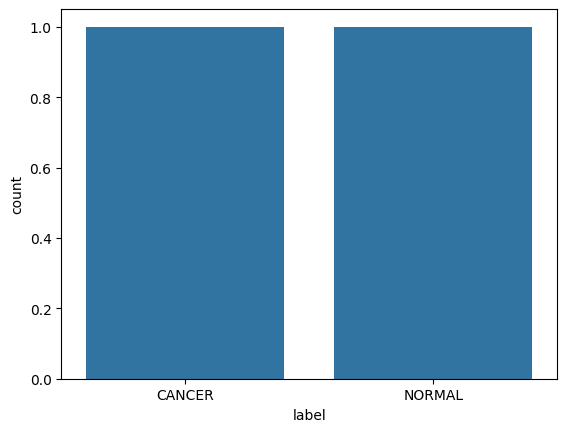

In [84]:
count = y_train.sum(axis = 0) 
df = pd.DataFrame({'label': ['CANCER', 'NORMAL'], 'count': count}) 
sns.countplot(x='label', data=df)

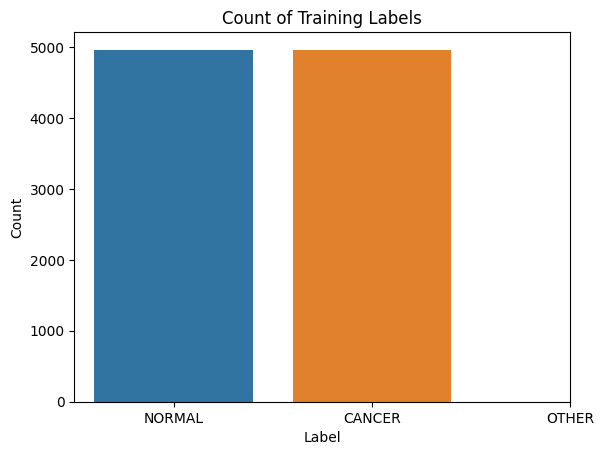

In [85]:
sns.countplot(y_train)
plt.title('Count of Training Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks([0, 1, 2], ['NORMAL', 'CANCER', 'OTHER'])
plt.show()


In [86]:
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint 
lr_reduce = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, 
min_delta=0.0001, patience=1, verbose=1)

In [90]:
from tensorflow.keras.callbacks import ModelCheckpoint
import os

# Define the file path with placeholders, ending in .keras
filepath = "model_checkpoints/weights_epoch-{epoch:02d}_val-acc-{val_accuracy:.2f}.keras"

# Create the checkpoint callback
checkpoint = ModelCheckpoint(
    filepath,
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    mode='max'
)

# Ensure the directory exists
os.makedirs(os.path.dirname(filepath), exist_ok=True)

# Example usage in model training
# model.fit(..., callbacks=[checkpoint])


In [97]:
import tensorflow as tf
from tensorflow.keras.constraints import Constraint

class MaxNorm(Constraint):
    def __init__(self, max_value=3.):
        self.max_value = max_value

    def __call__(self, weights):
        return tf.keras.backend.clip(weights, -self.max_value, self.max_value)

    def get_config(self):
        return {'max_value': self.max_value}


In [103]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, BatchNormalization, MaxPooling2D
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K
from tensorflow.keras.constraints import max_norm  # Built-in constraint example

# Define a custom MaxNorm constraint if needed
maxnorm = MaxNorm(max_value=3.)

def create_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3), padding='same', kernel_constraint=maxnorm))  # Use custom constraint
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, kernel_constraint=maxnorm))  # Use custom constraint
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))  # Adjust number of units based on classes
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [107]:
import tensorflow as tf
from tensorflow.keras.constraints import Constraint

class MaxNorm(Constraint):
    def __init__(self, max_value=3.):
        self.max_value = max_value

    def __call__(self, weights):
        norm = tf.linalg.norm(weights, ord='euclidean', axis=0)
        desired = tf.clip_by_value(norm, 0, self.max_value)
        return weights * desired / (norm + tf.keras.backend.epsilon())

    def get_config(self):
        return {'max_value': self.max_value}


In [108]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, BatchNormalization, MaxPooling2D
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K

# Define the model creation function
def create_model(optimizer='adam'):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3), padding='same', kernel_constraint=MaxNorm(max_value=3.)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, kernel_constraint=MaxNorm(max_value=3.)))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))  # Adjust number of units based on classes
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


In [111]:
%pip install --upgrade scikit-learn scikeras tensorflow


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\kusha\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [115]:
from keras.models import Sequential 
from keras.layers import Dense , Activation 
from keras.layers import Dropout 
from keras.layers import Flatten 

In [117]:
%pip install keras.constraints


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement keras.constraints (from versions: none)
ERROR: No matching distribution found for keras.constraints

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\kusha\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [118]:
%pip install maxnorm

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement maxnorm (from versions: none)
ERROR: No matching distribution found for maxnorm

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\kusha\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [120]:
from tensorflow.keras.constraints import max_norm

# Define your model creation function
def create_model(optimizer='adam'):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3), padding='same', kernel_constraint=max_norm(max_value=3.)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, kernel_constraint=max_norm(max_value=3.)))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


In [122]:
from keras.optimizers import SGD , RMSprop 
from keras.layers import Conv2D , BatchNormalization 
from keras.layers import MaxPooling2D 
from keras.utils import np_utils 
from keras import backend as K 
from sklearn.model_selection import GridSearchCV 
from keras.wrappers.scikit_learn import KerasClassifier 

ImportError: cannot import name 'np_utils' from 'keras.utils' (C:\Users\kusha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\api\utils\__init__.py)

In [123]:
%pip install utils

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for utils: filename=utils-1.0.2-py2.py3-none-any.whl size=13936 sha256=24b3573792cdfb17ca32be504010f219751bac6a3393d9a14280fe147a164e74
  Stored in directory: c:\users\kusha\appdata\local\pip\cache\wheels\b6\a1\81\1036477786ae0e17b522f6f5a838f9bc4288d1016fc5d0e1ec
Successfully built utils
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\kusha\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [125]:
%pip install utils

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\kusha\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [127]:
%pip install keras.constraints import maxnorm 


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement keras.constraints (from versions: none)
ERROR: No matching distribution found for keras.constraints

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\kusha\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [128]:
%pip install keras.optimizers import SGD , RMSprop 

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: ','

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\kusha\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [129]:
%pip install keras.layers import Conv2D , BatchNormalization 

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: ','

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\kusha\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [130]:
%pip install keras.layers import MaxPooling2D 

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement keras.layers (from versions: none)
ERROR: No matching distribution found for keras.layers

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\kusha\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [131]:
%pip install keras.utils import np_utils 

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement import (from versions: none)
ERROR: No matching distribution found for import

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\kusha\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [132]:
%pip install eras import backend as K 

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement import (from versions: none)
ERROR: No matching distribution found for import

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\kusha\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [133]:
%pip install sklearn.model_selection import GridSearchCV 

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement sklearn.model_selection (from versions: none)
ERROR: No matching distribution found for sklearn.model_selection

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\kusha\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [134]:
%pip install keras.wrappers.scikit_learn import KerasClassifier 

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement keras.wrappers.scikit_learn (from versions: none)
ERROR: No matching distribution found for keras.wrappers.scikit_learn

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\kusha\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [137]:
%pip install keras.constraints import maxnorm 

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement keras.constraints (from versions: none)
ERROR: No matching distribution found for keras.constraints

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\kusha\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [138]:
model = Sequential() 
model.add(Conv2D(16, (3, 3), activation='relu', padding="same", 
input_shape=(150,150,3))) 
model.add(Conv2D(16, (3, 3), padding="same", activation='relu')) 
model.add(Conv2D(32, (3, 3), activation='relu', padding="same")) 
model.add(Conv2D(32, (3, 3), padding="same", activation='relu')) 
model.add(Conv2D(64, (3, 3), activation='relu', padding="same")) 
model.add(Conv2D(64, (3, 3), padding="same", activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Flatten()) 
model.add(Dense(64, activation='relu')) 
model.add(Dropout(0.2)) 
model.add(Dense(2 , activation='softmax')) 
model.compile(loss='categorical_crossentropy', 
                  optimizer=RMSprop(learning_rate=0.00005), 
                  metrics=['accuracy']) 
print(model.summary())

C:\Users\kusha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 150, 150, 16)        │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 150, 150, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 150, 150, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 150, 150, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 360000)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │      23,040,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,112,274 (88.17 MB)

 Trainable params: 23,112,274 (88.17 MB)

 Non-trainable params: 0 (0.00 B)

None


In [139]:
batch_size = 256 
epochs =10 

In [141]:
history = model.fit(X_train, y_train, validation_data = (X_test , y_test) 
,callbacks=[lr_reduce,checkpoint] , 
          epochs=epochs) 
model.save('mymodel.h5') 

Epoch 1/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 16s/step - accuracy: 1.0000 - loss: 2.1594e-04 
Epoch 1: val_accuracy improved from -inf to 1.00000, saving model to model_checkpoints/weights_epoch-01_val-acc-1.00.keras
156/156 ━━━━━━━━━━━━━━━━━━━━ 2559s 16s/step - accuracy: 1.0000 - loss: 2.1510e-04 - val_accuracy: 1.0000 - val_loss: 1.4737e-07 - learning_rate: 5.0000e-05
Epoch 2/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 1.0000 - loss: 2.3538e-06 
Epoch 2: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-06.

Epoch 2: val_accuracy did not improve from 1.00000
156/156 ━━━━━━━━━━━━━━━━━━━━ 1983s 13s/step - accuracy: 1.0000 - loss: 2.3505e-06 - val_accuracy: 1.0000 - val_loss: 2.5865e-08 - learning_rate: 5.0000e-05
Epoch 3/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 36s/step - accuracy: 1.0000 - loss: 1.0122e-06 
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-07.

Epoch 3: val_accuracy did not improve from 1.00000
156/156 ━━━━━━━━━━━━━━━━━━━━ 5695s 3

In [142]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, BatchNormalization, MaxPooling2D
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.utils import to_categorical  # Replaces np_utils
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
import os

# Define the file path with .keras extension
filepath = "model_checkpoints/weights_epoch-{epoch:02d}_val-acc-{val_accuracy:.2f}.keras"

# Create the ModelCheckpoint callback
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# Ensure the directory exists
os.makedirs(os.path.dirname(filepath), exist_ok=True)

# Create the ReduceLROnPlateau callback with adjusted parameters
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='min', min_lr=1e-8)

# Define the model creation function
def create_model(optimizer='adam'):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3), padding='same', kernel_constraint=MaxNorm(3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, kernel_constraint=MaxNorm(3)))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Create and compile the model
model = create_model(optimizer=SGD(learning_rate=1e-4, momentum=0.9))

# Train the model with callbacks
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[checkpoint, reduce_lr]
)


Epoch 1/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 575ms/step - accuracy: 0.9867 - loss: 0.0429
Epoch 1: val_accuracy improved from -inf to 1.00000, saving model to model_checkpoints/weights_epoch-01_val-acc-1.00.keras
156/156 ━━━━━━━━━━━━━━━━━━━━ 112s 687ms/step - accuracy: 0.9867 - loss: 0.0426 - val_accuracy: 1.0000 - val_loss: 1.4102e-05 - learning_rate: 1.0000e-04
Epoch 2/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 544ms/step - accuracy: 1.0000 - loss: 3.0388e-04
Epoch 2: val_accuracy did not improve from 1.00000
156/156 ━━━━━━━━━━━━━━━━━━━━ 92s 583ms/step - accuracy: 1.0000 - loss: 3.0372e-04 - val_accuracy: 1.0000 - val_loss: 1.0330e-05 - learning_rate: 1.0000e-04
Epoch 3/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 579ms/step - accuracy: 1.0000 - loss: 2.0851e-04
Epoch 3: val_accuracy did not improve from 1.00000
156/156 ━━━━━━━━━━━━━━━━━━━━ 148s 622ms/step - accuracy: 1.0000 - loss: 2.0856e-04 - val_accuracy: 1.0000 - val_loss: 8.0255e-06 - learning_rate: 1.0000e-04
Epoch 4/10
156/156 ━━━━━━━━━━━━━━━━━━

In [144]:
import os

# List files in the model_checkpoints directory
print(os.listdir('model_checkpoints'))


['weights_epoch-01_val-acc-1.00.keras']


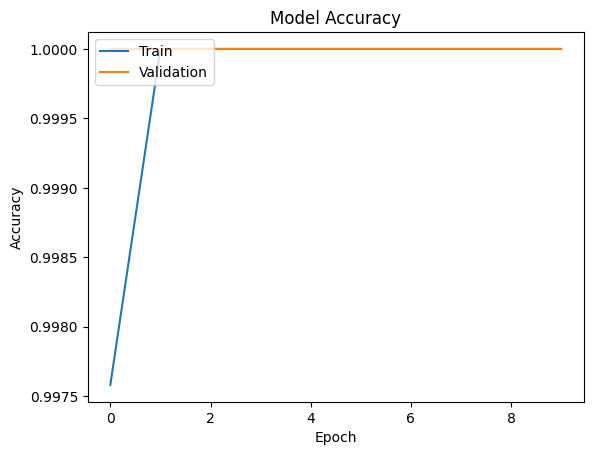

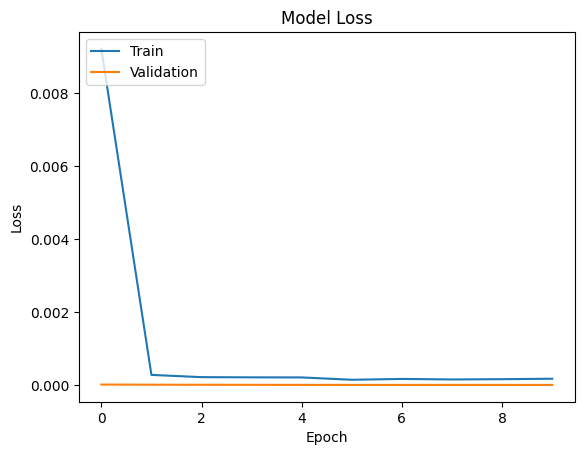

In [145]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

# Update the file path with the correct file name
model_file = 'model_checkpoints/weights_epoch-01_val-acc-1.00.keras'
model = load_model(model_file)

# Recompile the model if needed
model.compile(loss='categorical_crossentropy', 
              optimizer=RMSprop(learning_rate=0.00005), 
              metrics=['accuracy'])

# Ensure 'history' variable is available from training
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


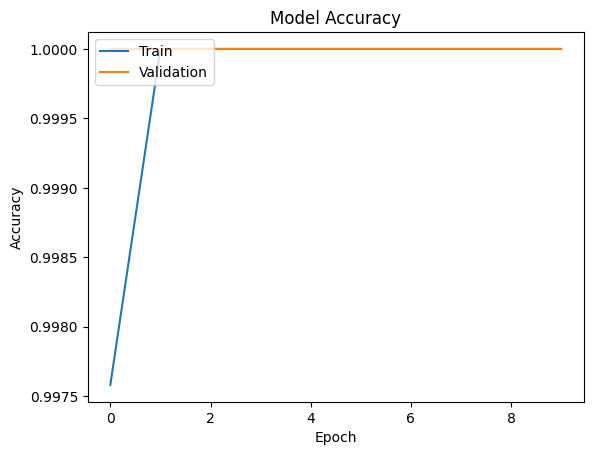

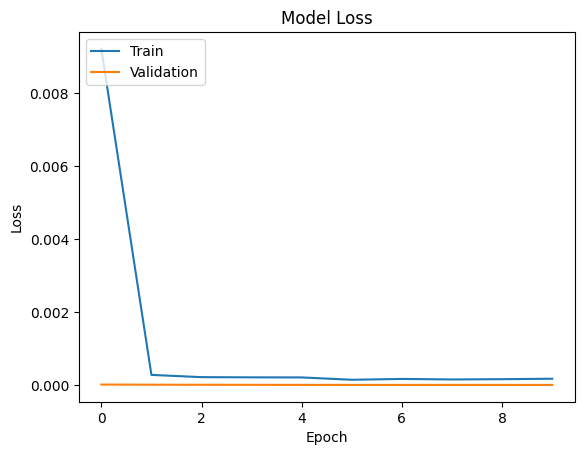

In [150]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

# Update the file path with the correct file name
model_file = 'model_checkpoints/weights_epoch-01_val-acc-1.00.keras'
model = load_model(model_file)

# Recompile the model if needed
model.compile(loss='categorical_crossentropy', 
              optimizer=RMSprop(learning_rate=0.00005), 
              metrics=['accuracy'])

# Ensure 'history' variable is available from training
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [159]:
%pip install matplotlib mlxtend tensorflow


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\kusha\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [164]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('model_checkpoints/weights_epoch-01_val-acc-1.00.keras')


In [163]:
import os
print(os.listdir('model_checkpoints'))


['weights_epoch-01_val-acc-1.00.keras']


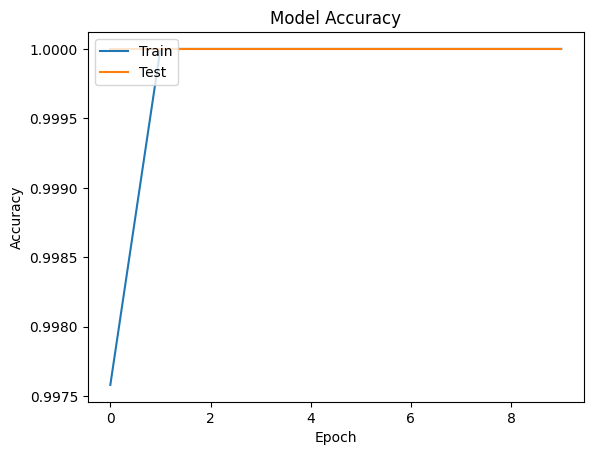

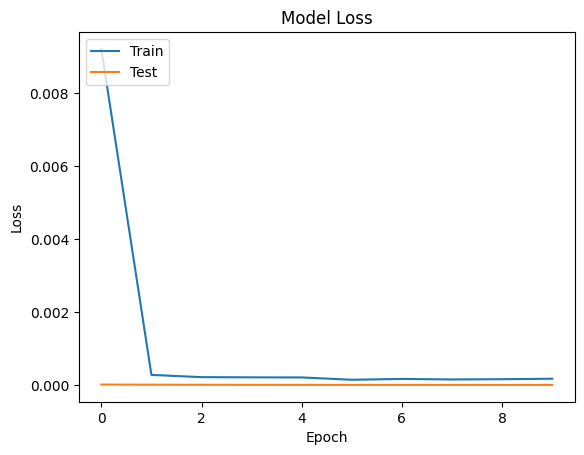

In [166]:
# Assuming history is available
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [170]:
%pip install --upgrade mlxtend


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\kusha\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [171]:
%pip install --upgrade matplotlib


   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB 487.6 kB/s eta 0:00:17
   ---------------------------------------- 0.1/8.0 MB 393.8 kB/s eta 0:00:21
   ---------------------------------------- 0.1/8.0 MB 476.3 kB/s eta 0:00:17
   ---------------------------------------- 0.1/8.0 MB 476.3 kB/s eta 0:00:17
   ---------------------------------------- 0.1/8.0 MB 476.3 kB/s eta 0:00:17
    --------------------------------------- 0.1/8.0 MB 327.2 kB/s eta 0:00:25
    --------------------------------------- 0.1/8.0 MB 327.4 kB/s eta 0:00:24
   - -------------------------------------- 0.3/8.0 MB 462.8 kB/s eta 0:00:17
   - -------------------------------------- 0.3/8.0 MB 462.8 kB/s eta 0:00:17
   - -------------------------------------- 0.3/8.0 MB 524.3 kB/s eta 0:00:15
   - --------

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\users\\kusha\\appdata\\local\\programs\\python\\python312\\lib\\site-packages\\matplotlib\\backends\\_backend_agg.cp312-win_amd64.pyd'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\kusha\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 167ms/step
[[1249]]


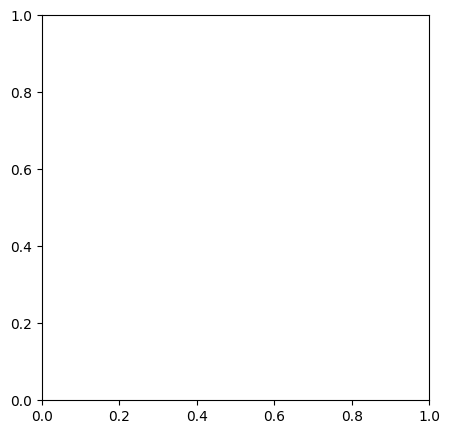

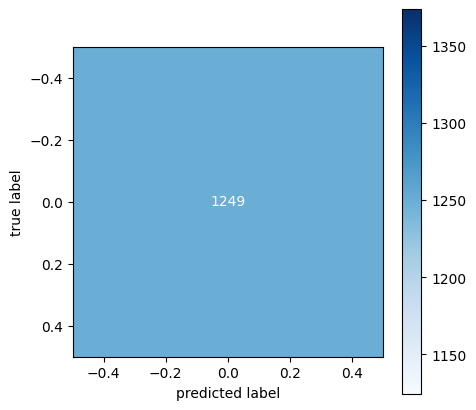

In [172]:
import numpy as np
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

# Ensure predictions are done on X_test, not y_test
pred = model.predict(X_test)
pred = np.argmax(pred, axis=1)  # Convert probabilities to class labels

# Convert y_test from one-hot encoded to class labels
y_true = np.argmax(y_test, axis=1)

# Calculate confusion matrix
conf_mat = confusion_matrix(y_true, pred)
print(conf_mat)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(conf_mat=conf_mat, figsize=(5, 5), show_absolute=True, show_normed=False, colorbar=True, cmap='Blues')
plt.show()


In [173]:
 
from keras.models import load_model 
# from keras.preprocessing import image 
import keras.utils as image 
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 

In [174]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import RMSprop

# Load the model
model = load_model('model_checkpoints/weights_epoch-01_val-acc-1.00.keras')

# Recompile the model if needed
model.compile(loss='categorical_crossentropy',  # or 'binary_crossentropy' depending on your use case
              optimizer=RMSprop(learning_rate=0.00005),
              metrics=['accuracy'])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
class [1]
Cancer


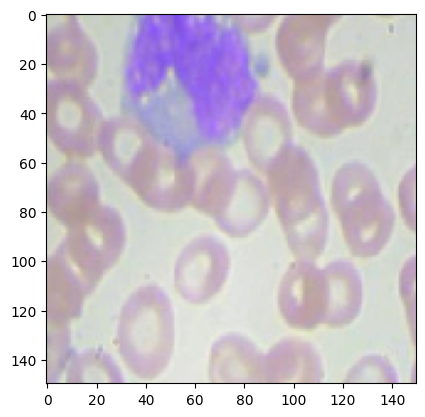

In [183]:
img=image.load_img('C:\\Users\\kusha\\OneDrive\\Desktop\\cancer\\cancer\\val\\Cancer\\_1_4511.jpeg', target_size=(150, 150)) 
imgplot = plt.imshow(img) 
x = image.img_to_array(img) 
x = np.expand_dims(x, axis=0) 
images = np.vstack([x]) 
# classes = model.predict_classes(images, batch_size=10) 
predict_x=model.predict(images, batch_size=10) 
classes=np.argmax(predict_x,axis=1) 
print("class", classes) 
if classes == [1]: 
   print("Cancer") 
else: 
   print("Normal")